## Font type Recognition using <font color= #70e514>Feed Forward Networks</font>

### Example form:

<img src=https://img1.od-cdn.com/ImageType-400/6135-1/67E/936/4A/%7B67E9364A-5248-4174-917C-549ED505ABC6%7DImg400.jpg height="200" width="160">



* <font size=5 color='green'>[MSTC](http://mstc.ssr.upm.es/big-data-track) seminar on Deep Learning, Tensorflow & Keras</font>

In [0]:
import tensorflow as tf
import numpy as np
import math


In [2]:
!python -m pip install tqdm

    100% |████████████████████████████████| 61kB 3.4MB/s 


In [0]:
try:
    from tqdm import tqdm
except ImportError:
    def tqdm(x, *args, **kwargs):
        return x

### ... review Numpy $reshape$ for reshaping images

In [4]:
a = np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [5]:
a.shape

(15,)

In [6]:
a.reshape(3, 5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [7]:
images=np.array([[[1,2],[3,4]],
                [[5,6],[7,8]],
                [[9,10],[11,12]]])

images.shape

(3, 2, 2)

In [8]:
images.reshape([-1,4])

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

# Loading data...

    Data: 2790 36x36 images

In [0]:
# Load data

"""
Load data
"""

import os
from six.moves import urllib

file_url = 'https://github.com/bloolizard/PlayWithTensorFlow/raw/master/data_with_labels.npz'
file_name = 'data_with_labels.npz'

if not os.path.exists(file_name):
    urllib.request.urlretrieve(file_url, file_name)
    
data = np.load('data_with_labels.npz')
train = data['arr_0']/255.
labels = data['arr_1']

In [0]:
# Import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### ...see the labels (font types)

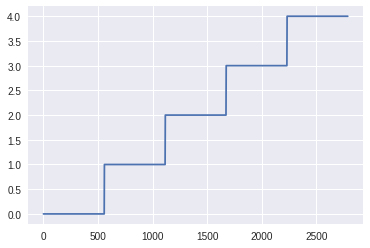

In [11]:
plt.plot(labels)

... let's see one image...

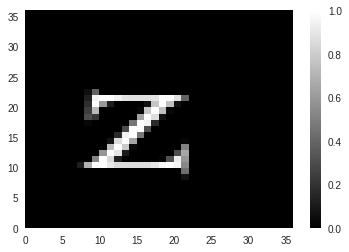

In [13]:
plt.pcolor(train[50], cmap=plt.cm.gray)
plt.colorbar()

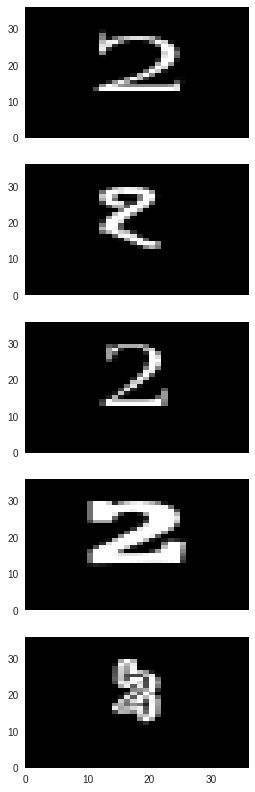

In [18]:

# Let's look at a subplot of one character in each font
f, plts = plt.subplots(5, figsize=(4,14), sharex=True)
c = 20
for i in range(5):
    plts[i].pcolor(train[c + i * 558],
                   cmap=plt.cm.gray)

In [0]:
def to_onehot(labels,nclasses = 5):
    '''
    Convert labels to "one-hot" format.

    >>> a = [0,1,2,3]
    >>> to_onehot(a,5)
    array([[ 1.,  0.,  0.,  0.,  0.],
           [ 0.,  1.,  0.,  0.,  0.],
           [ 0.,  0.,  1.,  0.,  0.],
           [ 0.,  0.,  0.,  1.,  0.]])
    '''
    outlabels = np.zeros((len(labels),nclasses))
    for i,l in enumerate(labels):
        outlabels[i,l] = 1
    return outlabels

onehot = to_onehot(labels)

In [15]:
onehot.shape

(2790, 5)

In [21]:
print(onehot[0:5])

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


### Permutation! + split data into training / validation

In [0]:
# Split data into training (90%) and validation (10%)

# Fix random seed to have same/comparable results
np.random.seed(100)

indices = np.random.permutation(train.shape[0])

valid_cnt = int(train.shape[0] * 0.1)

test_idx, training_idx = indices[:valid_cnt],\
                         indices[valid_cnt:]
  
test, train = train[test_idx,:],\
              train[training_idx,:]
  
onehot_test, onehot_train = onehot[test_idx,:],\
                        onehot[training_idx,:]
  

In [17]:
print('Train shape: ',train.shape)
print('Test shape: ', test.shape)

Train shape:  (2511, 36, 36)
Test shape:  (279, 36, 36)


In [24]:
onehot_train[0:5]

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [25]:
36*36

1296

In [26]:
onehot_train.shape

(2511, 5)

## **Complete Graph Definition:**

In [0]:
# These will be inputs
## Input pixels, flattened
x = tf.placeholder("float", [None, 1296])
## Known labels
y_ = tf.placeholder("float", [None,5])

# Hidden layer 1
num_hidden1 = 128
W1 = tf.Variable(tf.truncated_normal([1296,num_hidden1],
                               stddev=1./math.sqrt(1296)))
b1 = tf.Variable(tf.constant(0.1,shape=[num_hidden1]))
h1 = tf.sigmoid(tf.matmul(x,W1) + b1)

# Hidden Layer 2
num_hidden2 = 32
W2 = tf.Variable(tf.truncated_normal([num_hidden1,
            num_hidden2],stddev=2./math.sqrt(num_hidden1)))
b2 = tf.Variable(tf.constant(0.2,shape=[num_hidden2]))
h2 = tf.sigmoid(tf.matmul(h1,W2) + b2)

# Output Layer
W3 = tf.Variable(tf.truncated_normal([num_hidden2, 5],
                                   stddev=1./math.sqrt(5)))
b3 = tf.Variable(tf.constant(0.1,shape=[5]))

# Just initialize
#init=tf.initialize_all_variables()
init=tf.global_variables_initializer()

# Define the model
y = tf.matmul(h2,W3) + b3

### End model specification


In [0]:
# Loss function: cross-entropy
cross_entropy = tf.reduce_mean(
     tf.nn.softmax_cross_entropy_with_logits_v2(logits=y + 1e-50, labels=y_))

# How we train
train_step = tf.train.GradientDescentOptimizer(0.55).minimize(cross_entropy)

# Define accuracy
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction, "float"))

#predictions for our confusion matrix
preds=tf.nn.softmax(y)

# **...Training...**

In [22]:
# Actually train
epochs = 1500
train_acc = np.zeros(epochs//10)
test_acc = np.zeros(epochs//10)

with tf.Session() as sess:
    
    sess.run(init)


    for i in tqdm(range(epochs), ascii=True):
      if i % 10 == 0:  # Record summary data, and the accuracy
        # Check accuracy on train set
        A = accuracy.eval(feed_dict={x: train.reshape([-1,1296]), y_: onehot_train})
        train_acc[i//10] = A

        # And now the validation set
        A = accuracy.eval(feed_dict={x: test.reshape([-1,1296]), y_: onehot_test})
        test_acc[i//10] = A
        
      train_step.run(feed_dict={x: train.reshape([-1,1296]), y_: onehot_train})

    dnn_test_pred=sess.run(preds,feed_dict={x: test.reshape([-1,1296]), y_: onehot_test})
    W1_out=W1.eval()
    W3_out=W3.eval()

100%|##########| 1500/1500 [01:08<00:00, 22.00it/s]


Train Accuracy:  0.99
Test_Accuracy:  0.85


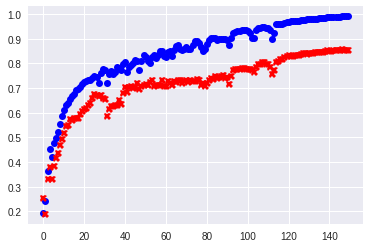

In [23]:
# Notice that accuracy flattens out
print('Train Accuracy: ',np.round(train_acc[-1],2))
print('Test_Accuracy: ',np.round(test_acc[-1],2))

# Plot the accuracy curves
plt.plot(train_acc,'bo')
plt.plot(test_acc,'rX')

## Confusion Matrix

In [31]:
!pip install pandas_ml

    100% |████████████████████████████████| 81kB 2.1MB/s 
  Running setup.py bdist_wheel for pandas-ml ... - \ done
  Stored in directory: /content/.cache/pip/wheels/13/57/a6/6c0dc8cffa09bb45bfb0b4f88fc13871342bac6a6394784f83
Successfully built pandas-ml


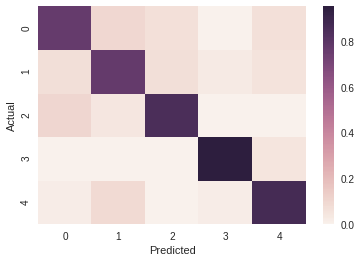

In [32]:
from pandas_ml import ConfusionMatrix

ConfMatrix=ConfusionMatrix(np.argmax(onehot_test,1), np.argmax(dnn_test_pred,1))

ConfMatrix.plot(normalized=True,backend='seaborn')

In [33]:
ConfMatrix.print_stats()

Confusion Matrix:

Predicted   0   1   2   3   4  __all__
Actual                                
0          47   6   4   0   4       61
1           5  55   5   2   4       71
2           5   2  41   0   0       48
3           0   0   0  41   2       43
4           1   5   0   1  49       56
__all__    58  68  50  44  59      279


Overall Statistics:

Accuracy: 0.8351254480286738
95% CI: (0.7862749215658708, 0.8766910952631582)
No Information Rate: ToDo
P-Value [Acc > NIR]: 4.43604122274996e-96
Kappa: 0.7925952261671972
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                        0          1          2  \
Population                                   279        279        279   
P: Condition positive                         61         71         48   
N: Condition negative                        218        208        231   
Test outcome positive                         58         68         50   
Test outcome negative                        221      

In [34]:
from sklearn.metrics import confusion_matrix as cm

ConfMatrix=cm(np.argmax(onehot_test,1), np.argmax(dnn_test_pred,1))

print('Confusion Matrix:\n',ConfMatrix)

Confusion Matrix:
 [[47  6  4  0  4]
 [ 5 55  5  2  4]
 [ 5  2 41  0  0]
 [ 0  0  0 41  2]
 [ 1  5  0  1 49]]


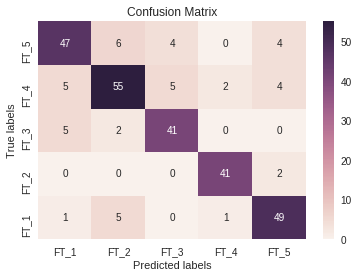

In [35]:
import seaborn as sns

ax= plt.subplot()
sns.heatmap(ConfMatrix, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['FT_1', 'FT_2','FT_3','FT_4','FT_5'])
ax.yaxis.set_ticklabels(['FT_1', 'FT_2','FT_3','FT_4','FT_5']);

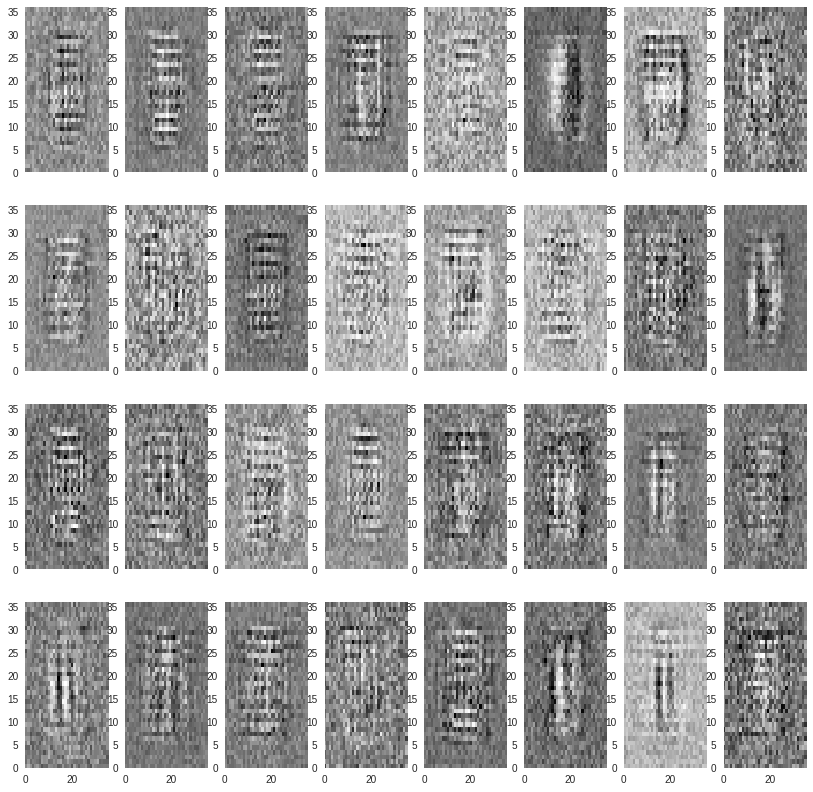

In [36]:
# Let's look at a subplot of some weights
f, plts = plt.subplots(4,8, figsize=(14,14), sharex=True)
for i in range(32):
    plts[i//8, i%8].pcolor(W1_out[:,i].reshape([36,36]))

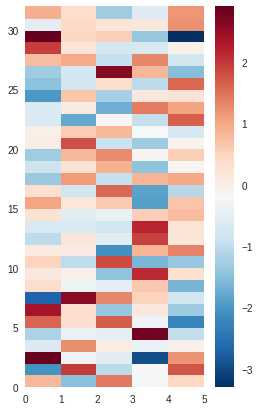

In [37]:
# Examine the output weights
plt.subplots(figsize=(4,7))
plt.pcolor(W3_out,cmap='RdBu_r')
plt.colorbar()